# 2.4 1차원 데이터의 시각화
50명의 영어 점수를  사용하여 데이터의 특징이나 분포를 표나 그림을 통해 시각적으로 파악할 수 있는 방법을 배워보자

In [29]:
import numpy as np
import pandas as pd

# 쥬피터와 DataFrame의 출력을 소수점 이하 3자리로 제한
%precision 3
pd.set_option("display.precision", 3)

df = pd.read_csv("../data/ch2_scores_em.csv", index_col="student number")

# 50명의 영어 점수 array
english_scores = np.array(df["english"])

#  Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

## 2.4.1 도수분포표(frequency distribution)
describe 메서드로 출력된 평균이나 표준편차, 사분위수 등의 지표로 데이터의 중심이나 산포도 상태를 알 수 있지만, 데이터의 분포 상태를 세부적으로 알고 싶을 때가 있다.
이럴때는 데이터가 취하는 값을 몇 개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가는가를 세는 방법이 있다.
이처럼 분할된 구간과 데이터의 개수를 표로 정리한 것이 **도수분포표(frequency distribution table)***이다.

시험 점수를 '0~10', '10~20', '90~100'점인 구간으로 10점 간격이 되게 나눈 후, 각 구간의 점수를 은 학생이 몇 명인지 세어어서 도수분포표를 작성할 수 있다.
이때 0~10점이라는 구간은 **계급(class)**
각 계급에 속한 학생 수를 **도수(frequency)**라고 한다.
또한 각 구간의 폭을 **계급 폭**이라 하고, 계급의 수를 **계급수**라고 한다.
(10점씩 나누었으므로 계급폭은 10점이고, 100점을 10점씩 구분하고 있으므로 계급수는 10이 된다.)

In [30]:
# 도수는 np.histgram 함수를 사용하면 간단하게 구할 수 있다.
# bins: 계급수
# range: 최솟값과 최댓값 지정
freq,_ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [31]:
# 0~10, 10~20, ..이라는 문자열 이르스틀 작성
freq_class = [f"{i}~{i+10}" for i in range(0, 100, 10)]
freq_class

freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name="class"))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


위 표를 보면 50~60점에 많은 학생이 몰려 있고, 고득점도 저득점도 없으며, 점수 차가 많이 나지 않는 시험이었다는 데이터의 특징을 간단하게 파악할 수 있다.

도수분포표에서는 계급과 도수 외에도 계급값, 상대도수, 누적상대도수도 자주 함께 사용된다.

**계급값**은 각 계급을 대표하는 값으로, 계급의 중앙값이 이용된다. (60~70의 계급이면 계급값은 65점이 된다.)

In [32]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

**상대도수**는 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도 비율을 차지하고 있는지를 나타낸다.

In [33]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

**누적상대도수**는 해당 계급까지의 상대도수의 합을 나타낸다.

In [34]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

계급값과 상대도수와 누적상대도수를 도수분포표에 추가해보자.

In [35]:
freq_dist_df["class value"] = class_value
freq_dist_df["relative frequency"] = rel_freq
freq_dist_df["cumulative relative frequency"] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


### 최빈값 재검토
도수분포표가 완성되었으므로 양적 데이터에 대해서도 자연스럽게 최빈값을 구할 수 있다.
도수분포표를 사용한 최빈값은 최대가 되는 계급의 계급값으로 정의된다. 도수분표포를 통해 60~70인 계급의 도수가 최대인 것을 알 수 있으므로, 이 데이터의 최댓값은 65점이다.

In [36]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

## 2.4.2 히스토그램(histogram)
히스토그램은 도수분포표를 막대그래프로 나타낸것이다. 히스토그램을 사용하여 데이터의 분포 상태를 더욱 시각적으로 파악할 수 있다.

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

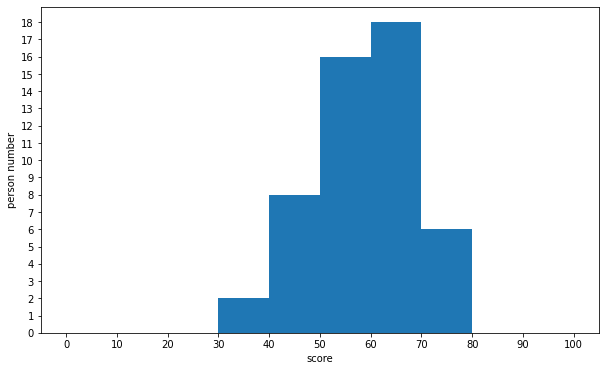

In [54]:
# figsize로 가로 세로 크기 지정
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
ax.set_xlabel("score")
ax.set_ylabel("person number")
# x축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

지금 까지 계급수를 10으로 지정했지만, 계끕수를 늘리면 더 세부적인 데이터의 분포를 볼 수 있따. 계급수를 25, 즉 계급폭을 4점으로 하여 히스토그램을 출력해보자.

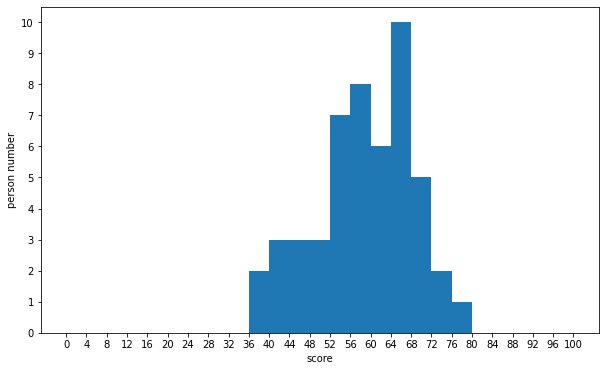

In [56]:
# figsize로 가로 세로 크기 지정
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel("score")
ax.set_ylabel("person number")
# x축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

계급폭을 변경하니 히스토그램의 모양이 크게 변했다. 도수분포표와 히스토그램은 계급수에 따라 모양이 크게 변하므로 데이터에 다라 적절한 값으로 설정하는 것이 좋다.

마지막으로 상대도수의 히스토그램을 누적상대도수의 꺾은선 그래프와 함께 그려보자
(히스토그램과 누적상대도수)

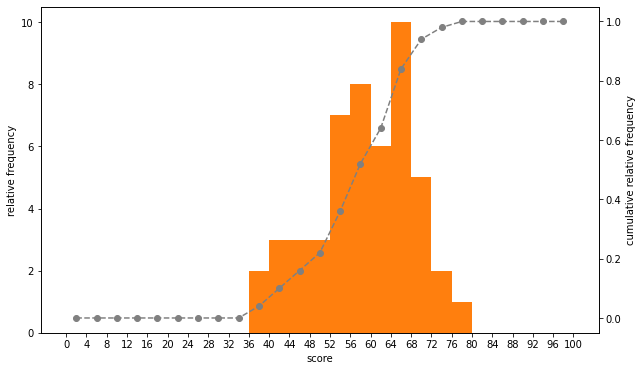

In [69]:
# figsize로 가로 세로 크기 지정
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있다.
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
req_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)


cum_rel_freq = np.cumsum(req_freq)
class_value = [(i + (i + 4)) // 2 for i in range(0, 100, 4)]

# 꺾은선 그래프를 그림
ax2.plot(class_value, cum_rel_freq, ls="--", marker="o", color="gray")
ax2.grid(visible=False) # 꺾은선 그래프의 눈금선을 제거


# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100))
ax1.set_xlabel("score")
ax1.set_ylabel("relative frequency")
ax2.set_ylabel("cumulative relative frequency")

# x축을 0, 10, 20, ..., 100 눈금으로 구분
ax1.set_xticks(np.linspace(0, 100, 25+1))
plt.show()

## 2.4.3 상자그림(box plot)

상자그림은 데이터의 산포도를 표현하는 그림이다. 상자그림을 그리면 데이터의 분포와 이상값을 시각적으로 파악할 수 있다.

상자그림에서는 분위수 범위의 Q1, Q2, Q3, IQR을 사용한다.
상자는 Q1부터 Q3을 나타내고, 수염은 Q1-1.5IQR부터 Q3+1.5IQR을 나타낸다. 여기에 들어가지 않은 데이터는 이상값이 된다.


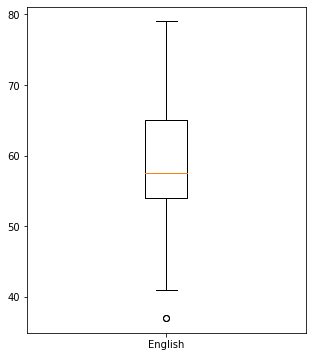

In [71]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(english_scores, labels=["English"])

plt.show()

# 상자그림에서도 60점 전후의 점수를 받은 학생이 많다는 것을 알 수 있다.